In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [104]:
episodes = pd.read_csv("data/episodes.csv", header=0,
                       usecols=["title", "season", "episode"],
                       names=["title", "c1", "c2", "c3", "c4", "season", "episode"])

In [106]:
lines = pd.read_csv("data/lines_full.csv", header=0,
                    names=["title", "character", "line"])

In [107]:
lines

,title,character,line
0,Cartman Gets an Anal Probe,Scene Description,At the bus stop.
1,Cartman Gets an Anal Probe,The Boys,"School days, school days, teacher's golden ru..."
2,Cartman Gets an Anal Probe,Kyle Broflovski,"Ah, damn it! My little brother's trying to fol..."
3,Cartman Gets an Anal Probe,Ike Broflovski,Eat banana.
4,Cartman Gets an Anal Probe,Kyle,"Ike, you can't come to school with me. [Ike Ch..."
...,...,...,...
95315,South ParQ Vaccination Special,Cartman,[turns to face Clyde] Yeah?
95316,South ParQ Vaccination Special,Clyde,[standing with Jimmy and an unnamed Hispanic k...
95317,South ParQ Vaccination Special,Cartman,[he takes off his mask] Casa Bonita?! Hell yea...
95318,South ParQ Vaccination Special,Scene Description,Fourth grade classroom. Mr. Garrison opens the...


In [108]:
lines.character.value_counts().head(40)

Cartman               11307
Scene Description     11116
Stan                   8364
Kyle                   7902
Randy                  3493
Butters                3061
Mr. Garrison           1220
Sharon                 1051
Kenny                  1007
Chef                    966
Gerald                  965
Mr. Mackey              808
Jimmy                   748
Sheila                  716
Liane                   688
Jimbo                   659
Wendy                   638
Stephen                 626
Craig                   443
Announcer               426
Clyde                   363
Heidi                   347
Mayor McDaniels         342
Token                   340
Tweek                   333
PC Principal            328
Jesus                   325
Linda                   317
Principal Victoria      313
Terrance                300
Scott                   300
Officer Barbrady        282
Mrs. Garrison           282
Timmy                   268
Ike                     246
Shelly              

In [109]:
lines_short = lines[lines.character.isin(lines.character.value_counts()[:10].index)]
lines_short = lines_short[lines_short.character != "Scene Description"]

lines_short = lines_short[lines_short.character.isin(["Kyle", "Cartman", "Stan", "Kenny", "Butters"])]

lines_short.title = lines_short.title.str.replace("Shots", "Shots!!!")
lines_short.title = lines_short.title.str.replace("HappyHolograms", "#HappyHolograms")
lines_short.title = lines_short.title.str.replace("REHASH", "#REHASH")
lines_short.title = lines_short.title.str.replace("Imaginationland$", "Imaginationland Episode I", regex=True)

In [110]:
lines_short.to_csv("data/lines.csv")

In [111]:
len(lines_short)/len(lines)

0.3319450272765422

In [40]:
lines_short.head()

,title,character,line
4,Cartman Gets an Anal Probe,Kyle,"Ike, you can't come to school with me. [Ike Ch..."
6,Cartman Gets an Anal Probe,Kyle,"Dude, don't call my brother a dildo!"
8,Cartman Gets an Anal Probe,Kyle,"Well, I don't know...[He faces Cartman and poi..."
9,Cartman Gets an Anal Probe,Cartman,I know what it means!
10,Cartman Gets an Anal Probe,Kyle,"Well, what?"


In [112]:
data = lines_short.merge(episodes, how="left", on="title")
data.season = data.season.astype(int)
data.episode = data.episode.astype(int)

In [113]:
to_plot = data.groupby(["season", "character"]).size()

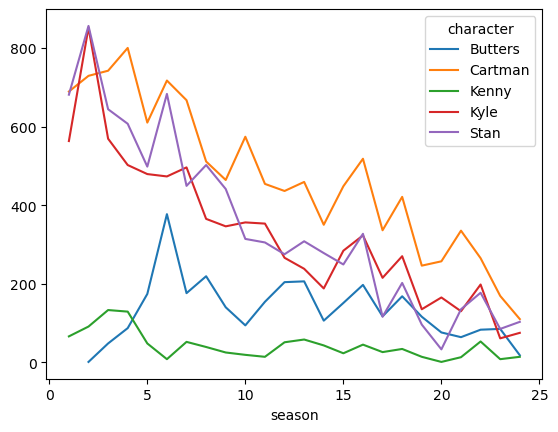

In [114]:
to_plot.unstack().plot()
plt.show()